In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loss_function(X, y, w):
    N = y.shape[0]
    y_predict = X.dot(w)
    diff = y_predict - y
    
    gradient = np.zeros(w.shape[0])
    gradient = 1/N * (X.transpose().dot(diff))
    
    loss = 1/(2*N) * np.sum(diff ** 2)
    
    return loss, gradient

In [37]:
def gradient_descent(X, y, w, alpha=0.01, num_iter=100, eps=10e-5):
    loss_history = np.zeros((num_iter, 1))
    it_break = num_iter
    
    for i in range(num_iter):
        loss, gradient = loss_function(X, y, w)        
        w = w - alpha * gradient
        
        loss_history[i] = loss
        # print(f'Iteration {i + 1}: Loss = {loss}')
        
        if i > 0 and np.abs(loss - loss_history[i-1]) <= eps:
            it_break = i
            break
    
    return w, loss_history, it_break

In [58]:
def train_analytic(X, y):
    X_T = X.transpose()
    return np.linalg.pinv(X_T.dot(X)).dot(X_T).dot(y)

In [5]:
def show_model(model):
    n = model.shape[0]
    
    print('f_w(x) = ', end='')
    for i in range(n):
        if i == 0:
            print(f'{round(model[i][0], 3)} + ', end='')
        elif i < n - 1:
            print(f'{round(model[i][0], 3)}*x{i-1} + ', end='')
        else:
            print(f'{round(model[i][0], 3)}*x{i-1}', end='')

In [6]:
def hypothesis(w, x):
    return w.transpose().dot(x)[0][0]

In [7]:
df = pd.read_csv('../datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [8]:
df = df.replace('?', np.nan)
df = df.dropna()

In [9]:
y = df['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [10]:
X = df.drop('mpg', axis=1)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [11]:
N = y.shape[0]
print(f'Broj instanci: {N}')

Broj instanci: 396


In [12]:
m = X.shape[1]
print(f'Broj atributa: {m}')

Broj atributa: 6


In [13]:
y = np.array(y)
y = y.reshape(-1, 1)

In [14]:
X = np.ones((N, m + 1))

for i in range(m):
    attr_i = df.iloc[:, i]
    X[:, i + 1] = attr_i

print('Podaci u numpy formatu:')
print(X)

Podaci u numpy formatu:
[[1.000e+00 1.800e+01 8.000e+00 ... 1.300e+02 3.504e+03 1.200e+01]
 [1.000e+00 1.500e+01 8.000e+00 ... 1.650e+02 3.693e+03 1.150e+01]
 [1.000e+00 1.800e+01 8.000e+00 ... 1.500e+02 3.436e+03 1.100e+01]
 ...
 [1.000e+00 3.200e+01 4.000e+00 ... 8.400e+01 2.295e+03 1.160e+01]
 [1.000e+00 2.800e+01 4.000e+00 ... 7.900e+01 2.625e+03 1.860e+01]
 [1.000e+00 3.100e+01 4.000e+00 ... 8.200e+01 2.720e+03 1.940e+01]]


In [15]:
w_init = np.zeros((m + 1, 1))
print('Inicijalizacija w:')
print(w_init)

Inicijalizacija w:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [60]:
# Napomena: za broj za num_iter <= 6000 se dobija manja predikcija nego sto bi trebalo,
# a za num_iter >= 7000 veca. Pretpostavljam da to moze da bude samo iz dva razloga:
#     1) Korak alpha je veliki i nakon dolaska do minimuma on ga preskace i nastavlja
#        dalje sa pretragom, zbog cega se napusta lokalni optimum
#     2) underfit/overfit
alpha = 10e-8 * 2
num_iter = 6500
eps = 10e-5

w, loss_history, it_break = gradient_descent(X, y, w_init, alpha, num_iter, eps)
print(loss_history)

Iteration 1: Loss = 307.1398484848485
Iteration 2: Loss = 274.8537439606008
Iteration 3: Loss = 247.35694147335607
Iteration 4: Loss = 223.93756668275984
Iteration 5: Loss = 203.98955895016346
Iteration 6: Loss = 186.9969430836322
Iteration 7: Loss = 172.52043894658857
Iteration 8: Loss = 160.18606142769266
Iteration 9: Loss = 149.6754149226601
Iteration 10: Loss = 140.71743045406032
Iteration 11: Loss = 133.08133099393845
Iteration 12: Loss = 126.57064242795286
Iteration 13: Loss = 121.01809473582706
Iteration 14: Loss = 116.28128106546454
Iteration 15: Loss = 112.23896204665272
Iteration 16: Loss = 108.78791943529293
Iteration 17: Loss = 105.84027743511623
Iteration 18: Loss = 103.32122218083214
Iteration 19: Loss = 101.1670601995952
Iteration 20: Loss = 99.32356546471148
Iteration 21: Loss = 97.74457214494389
Iteration 22: Loss = 96.39077652897562
Iteration 23: Loss = 95.22871703302613
Iteration 24: Loss = 94.22990582116019
Iteration 25: Loss = 93.37008950242782
Iteration 26: Loss =

In [61]:
w_analytic = train_analytic(X, y)

In [62]:
print(f'Trained model:')
show_model(w)

print()
print(f'Trained model (analytic):')
show_model(w_analytic)

Trained model:
f_w(x) = 0.002 + 0.129*x0 + 0.003*x1 + -0.152*x2 + 0.01*x3 + 0.016*x4 + 0.041*x5
Trained model (analytic):
f_w(x) = -0.0 + 1.0*x0 + 0.0*x1 + -0.0*x2 + 0.0*x3 + 0.0*x4 + 0.0*x5

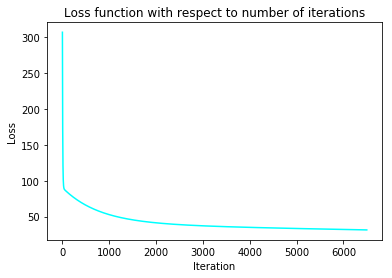

In [63]:
plt.plot(range(it_break), loss_history[:it_break, 0], color='aqua')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.title('Loss function with respect to number of iterations')
plt.show()

In [50]:
cylinders = int(input('Cylinders: '))
displacement = float(input('Displacement: '))
horsepower = float(input('Horsepower: '))
weight = float(input('Weight: '))
acceleration = float(input('Acceleration: '))
model_year = float(input('Model-year: '))

In [64]:
x = np.array([1, cylinders, displacement, horsepower, 
              weight, acceleration, model_year]).reshape(-1, 1)
print('Input instance:')
print(x)

Input instance:
[[1.000e+00]
 [8.000e+00]
 [3.100e+02]
 [1.300e+02]
 [3.515e+03]
 [1.210e+01]
 [7.000e+01]]


In [65]:
predicted_mpg_gd = hypothesis(w, x)
predicted_mpg_analytic = hypothesis(w_analytic, x)

print(f'Mpg = {predicted_mpg_gd} (gradient descent)')
print(f'Mpg = {predicted_mpg_analytic} (analytic)')

Mpg = 21.94899728482704 (gradient descent)
Mpg = 8.00000002056549 (analytic)
